In [1]:
from typing import Tuple
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, poisson
import scipy

# функции для генерации данных

def generate_sample_for_statistic_calculation(size: int = 10000) -> np.ndarray:
    rnd_mean = np.random.normal(5, 5, size=1)[0]
    rnd_std = np.random.poisson(5, size=1)[0]
    return norm(rnd_mean, rnd_std).rvs(size)


def correlation_data() -> Tuple[np.ndarray, np.ndarray]:
    sample1 = norm(0, 1).rvs(1000)
    noise = norm(0, 1).rvs(1000)
    sample2 = np.random.normal(0, 1, size=1)[0] * sample1 + np.random.normal(0, 1, size=1) + noise
    return sample1, sample2


def task3_data() -> np.ndarray:
    if np.random.random() < 0.8:
        return norm(0, 1).rvs(1000)
    else:
        return poisson(5).rvs(1000)
    
    
def task4_part1() -> Tuple[np.ndarray, np.ndarray]:
    rnd_mean1 = np.random.normal(5, 5, size=1)[0]
    rnd_std1 = np.random.poisson(5, size=1)[0]
    
    rnd_mean2 = np.random.normal(5, 5, size=1)[0]
    rnd_std2 = np.random.poisson(5, size=1)[0]
    
    sample1 = norm(rnd_mean1, rnd_std1).rvs(1000)
    sample2 = norm(rnd_mean2, rnd_std2).rvs(1000)
    
    print(f"sample1 mean: {sample1.mean()}")
    print(f"sample2 mean: {sample2.mean()}")

    return sample1, sample2
    

### Задание 1

In [2]:
# Функция generate_sample_for_statistic_calculation() отдает выборку значений некоторого распределения.
# Посчитать общие статистики: 
#    минимум, максимум, медиана, среднее, дисперсия, стандратное отклонение, 0.25 и 0.75 квантили
# Используйте numpy и его функции агрегации.
# Для подсчета квантилей используйте функцию np.quantile(). Аргументы посмотрите в документации.
# Выведите все статистики по очереди на каждой строчке через print. 
# Посмотрите на цифры. Сделайте выводы о том, какие значения может принимать анализируемая случайная величина. 
# Как соотносятся между собой статистики? 
# Например, сильно ли отклоняются минимальные и максимальные значения от среднего?

values = generate_sample_for_statistic_calculation()

In [ ]:
print("Минимум: ", np.min(values))
print("Максимум: ", np.max(values))
print("Среднее: ", np.mean(values))
print("Медиана: ", np.median(values))
print("Дисперсия: ", np.var(values))
print("Стандартное отклонение: ", np.std(values))
print("Квантиль 0.25: ", np.quantile(values, 0.25))
print("Квантиль 0.75: ", np.quantile(values, 0.75))

# Среднее значение и медиана близки друг к другу, 
# что может свидетельствовать о том, что распределение может быть близким к нормальному. 

### Задание 2

In [3]:
# Корреляция
# Корреляция показывает линейную зависимость между величинами и может принимать значения от -1 до 1.
# 1 и -1 показывают сильную корреляцию. Значение близкое к нулю показывает то, что корреляции почти нет.
# Напишите функцию корреляции с помощью модуля numpy.
# Функция принимает 2 выборки. И возвращает одно число.
# Сравните по времени (функция %%timeit) работу вашей функции и функции np.corrcoef() модуля numpy

# Формула для расчет корреляции ниже:

## $corr(x,y) = \frac{\sum_i^N{(x_i-\bar{x}) (y_i-\bar{y})}}{std(x) * std(y)} * \frac{1}{N}$

#### $\sum - знак \, суммирования \, по \, членам \, вектора$
#### $std - стандартное \, отклонение$
#### $\bar{x} - среднее \, вектора$

In [46]:

sample1, sample2 = correlation_data()

def correlation(x, y):
    return np.sum((x - np.mean(x)) * (y - np.mean(y)) / (len(x) * np.std(x) * np.std(y)))


In [45]:
%%timeit
correlation(sample1, sample2)

54.9 µs ± 125 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [44]:
%%timeit
np.corrcoef(sample1,sample2) #различия во времени не существенны

50.9 µs ± 237 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Задание 3

In [5]:
# Код генерирует данные, которые вы должны проверить на нормальность распределения.
# Напишите код, который это выполняет.
# Определите нулевую гипотезу и альтернативную.
# Задайте уровень значимости.
# проведите тест и сделайте выводы на его основе.
# выведи вс нужные для принятия решения результаты на экран

In [40]:
import numpy as np
from scipy.stats import shapiro

def task3_data() -> np.ndarray:
    if np.random.random() < 0.8:
        return np.random.normal(0, 1, 1000)
    else:
        return np.random.poisson(5, 1000)

values = task3_data()
stat, p = shapiro(values)
alpha = 0.05

print("Шапиро-Уилка тест:\nstat:", stat)
print("p:", p)

if p > alpha:
    print("Данные нормально распределены")
else:
    print("Данные нормально не распределены")

Шапиро-Уилка тест:
stat: 0.9986146092414856
p: 0.6309080123901367
Данные нормально распределены


### Задание 4

#### Подзадание 1

In [7]:
# проведите ttest на двух множествах (используйте ttest_ind метод из scipy.stats)
# выберите уровень значимости.
# определите нулевую и и альтернативную гипотезы.
# получите p_value. Определите прокрасился ли тест или нет.
# сделайте выводы.
# выводите все нужные для анализа результаты на экран

In [47]:
from scipy.stats import ttest_ind


sample1, sample2 = task4_part1()

def perform_ttest():
    alpha = 0.05

    statistic, p_value = ttest_ind(sample1, sample2)

    if p_value > alpha:
        result = "Тест не прокрасился. Cтатистически значимая разница между выборками отсутствует."
    else:
        result = "Тест прокрасился. Cтатистически значимая разница между выборками присутствует."

    return p_value, result

p_value, result = perform_ttest()

print("p_value:", p_value)
print(result)

sample1 mean: 9.250290535531331
sample2 mean: -2.624241686259411
p_value: 0.0
Тест прокрасился. Cтатистически значимая разница между выборками присутствует.


#### подзадание 2

In [9]:
# Подбрасывали игральную кость. Делали это 1000 раз. Получили следующие показания.
# Вопрос: является ли кость симметричной? То есть любая грань может выпасть одинаковое кол-во раз?
# возьмите функцию chisquare из scipy.stats и проведи проверку.
# выберите уровень значимости.
# определите нулевую и и альтернативную гипотезы.
# получите p_value. Определите прокрасился ли тест или нет.
# сделайте выводы.

# После выводов проделайте следующее:
# Как должны были выпасть грани, чтобы тест показал противоположный результат? Запишите получившийся вариант

$$
\begin{aligned}
&\begin{array}{cccc}
\hline Ребро & 1 & 2 & 3 & 4 & 5 & 6 \\
\hline Кол-во \, выпаданий & 150 & 153 & 166 & 170 & 183 & 178 \\
\hline
\end{array}
\end{aligned}
$$

In [38]:
from scipy.stats import chisquare

observed = np.array([150, 153, 166, 170, 183, 178])
expected = np.array([1000 / 6] * 6)

chi_stat, p_value = chisquare(f_obs=observed, f_exp=expected)
alpha = 0.05

print("Статистика chi_stat:", chi_stat)
print("p_value:", p_value)

if p_value < alpha:
    print("Кость не симметрична")
else:
    print("Кость симметрична")

# Чтобы тест показал противоположный результат, грани должны выпасть неравномерно.


Статистика chi_stat: 5.228
p_value: 0.3886932697639033
Кость симметрична


### Задание 5

In [11]:
# Интегрирование. 
# Напишите функцию, которая определена на интервале от -10 до 10. 
# Функция на ваше усмотрение.
# Посчитайте интеграл (площадь под кривой) вашей функции.
# Проверьте себя либо аналитическим расчетом интеграла, либо воспользовавшись сервисом 
# https://www.integral-calculator.ru/

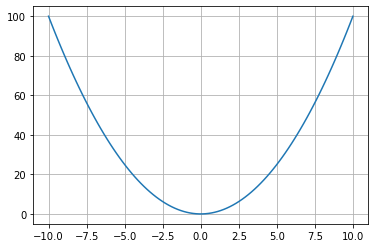

Интеграл функции y(x) на интервале от -10 до 10 = 666.6666666666667


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad


x = np.linspace(-10, 10, 100)
def y(x):
    return x**2

plt.plot(x, y(x))
plt.grid(True)
plt.show()

integral, error = quad(y, -10, 10)

print("Интеграл функции y(x) на интервале от -10 до 10 =", integral)

### Задание 6

In [ ]:
# Решите задачу интерполирования.
# У вас есть конечное число точек. Постройте на них функцию, которую хочется.
# Проведите на ней процедуру интерполяции. 
# Проверьте либо руками, либо с помощью питона результат работы вашей интерполяции 
# результат и выводы выведи на экран.

In [ ]:
from scipy import interpolate

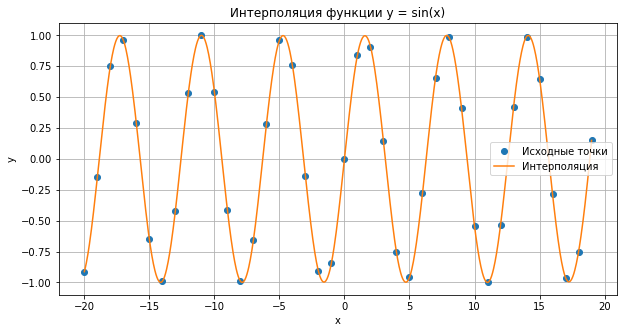

In [48]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

x = np.arange(-20, 20, 1)
y = np.sin(x)

cs = CubicSpline(x, y)

x_new = np.linspace(-20, 19, 1000)
y_new = cs(x_new)

plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o', label='Исходные точки')
plt.plot(x_new, y_new, '-', label='Интерполяция')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Интерполяция функции y = sin(x)')
plt.grid(True)
plt.legend()
plt.show()